<a href="https://colab.research.google.com/github/Sikandarh11/Machine-Learning-Projects/blob/main/LogisticRegression(Employee_Attrition_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
8698,0.56,0.73,3,226,3,0,0,0,RandD,medium
6834,0.97,0.63,3,270,4,1,0,0,technical,high
1566,0.10,0.96,6,274,4,0,1,0,technical,low
8511,1.00,0.60,4,261,3,0,0,0,technical,low
6239,0.72,0.98,3,181,4,0,0,0,technical,low
6550,0.73,0.67,4,153,3,0,0,0,IT,high
12689,0.87,1.00,4,228,5,0,1,0,support,medium
9525,0.87,0.71,5,244,2,0,0,0,IT,low
5156,0.99,0.76,4,185,5,0,0,0,technical,low
11084,0.93,0.94,4,233,6,0,0,0,IT,medium


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

(14999, 10)

In [ ]:
left = df[df.left ==1]
left.shape

(3571, 10)

In [ ]:
nleft = df[df.left ==0]
nleft.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

<ipython-input-11-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='left'>

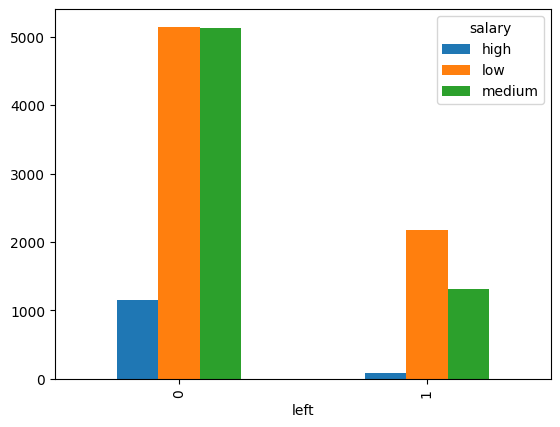

In [ ]:
pp = pd.crosstab(df.left, df.salary)
pp.plot(kind = 'bar')

<Axes: xlabel='left'>

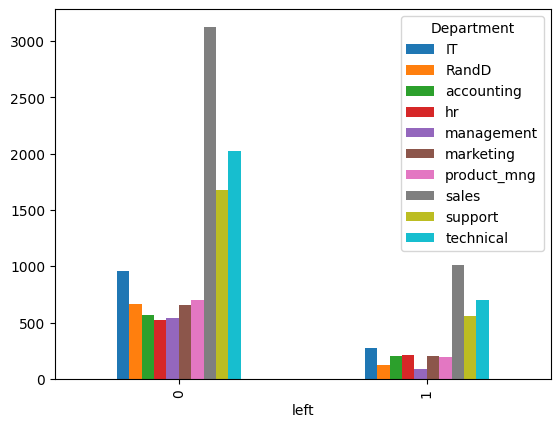

In [ ]:
pp = pd.crosstab(df.left, df.Department)
pp.plot(kind = 'bar')

In [ ]:
ddf = df[['satisfaction_level',	'average_montly_hours',	'promotion_last_5years',	'salary']]

In [ ]:
salary_dummy = pd.get_dummies(ddf.salary)
salary_dummy
ddf = pd.concat([ddf,salary_dummy], axis=1)
ddf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [ ]:
ddf.drop(['salary'], axis = 1, inplace = True)

In [ ]:
ddf

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ddf , y, test_size = 0.2, random_state = 1)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
accuracy_score(pred, y_test)

0.7733333333333333

In [ ]:
import pickle
with open("Picke_File", "wb") as f:
  pickle.dump(model, f)

In [ ]:
from joblib import load, dump

In [ ]:
with open("JoblibFile", "wb") as f:
  dump(model, f)